In [4]:
%matplotlib inline

In [54]:
# dependencies & set up
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
from IPython.display import display
import scipy.stats as stats

# data csv includes enrollment totals per school per year
data_filepath = "Resources/output_data/econ_district_merged.csv"

data_df = pd.read_csv(data_filepath)

In [9]:
unemployment_df = data_df[["District", "Year", "NCESDist", "Unemployment Rate, 16+", "Unemployment Rate, 20-64"]]

,District,Year,NCESDist,"Unemployment Rate, 16+","Unemployment Rate, 20-64"
0,Rocklin Unified,2018,600013,5.6,5.0
1,Rocklin Unified,2019,600013,4.4,4.1
2,Hesperia Unified,2015,600014,14.7,13.8
3,Hesperia Unified,2016,600014,8.7,7.7
4,Hesperia Unified,2017,600014,11.8,8.9
...,...,...,...,...,...
969,Val Verde Unified,2015,691135,10.7,10.2
970,Val Verde Unified,2016,691135,5.9,5.1
971,Val Verde Unified,2017,691135,10.8,10.5
972,Val Verde Unified,2018,691135,NaN,NaN


In [12]:
avg_unemployment_year = unemployment_df.groupby("Year").mean()
avg_unemployment_year

,NCESDist,"Unemployment Rate, 16+","Unemployment Rate, 20-64"
Year,,,
2015,621812.886010,7.269271,6.745833
2016,621692.561856,6.469474,6.035263
2017,621642.790816,5.900000,5.452356
2018,621374.060914,5.511053,5.127368
2019,621368.247423,5.053514,4.659459


<function matplotlib.pyplot.show(close=None, block=None)>

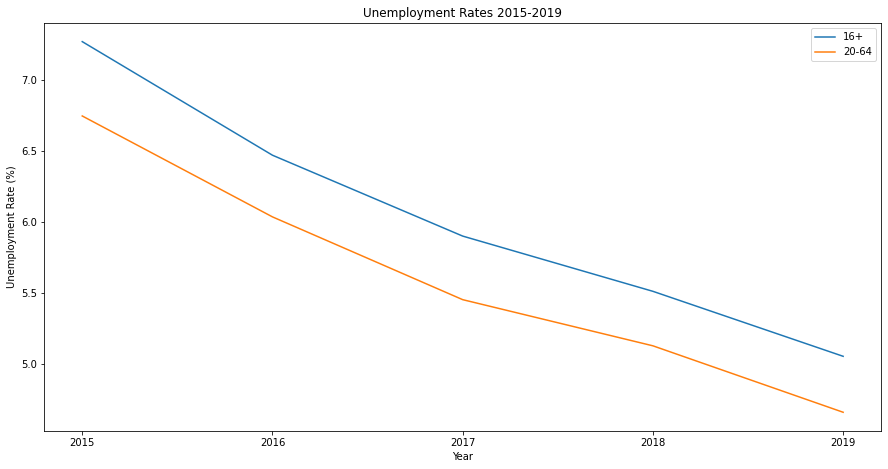

In [21]:
# plotting average unemployment across California for 16+ and 20-64 age groups
unemp_16_y = avg_unemployment_year["Unemployment Rate, 16+"]
unemp_20_y = avg_unemployment_year["Unemployment Rate, 20-64"]
x_axis_econ = ["2015", "2016", "2017", "2018", "2019"]

plt.figure(figsize=(15,7.5))
plt.plot(x_axis_econ, unemp_16_y, label="16+")
plt.plot(x_axis_econ, unemp_20_y, label="20-64")
plt.legend()
plt.title("Unemployment Rates 2015-2019")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")

plt.show

In [24]:
is_lausd = data_df["District"] == "Los Angeles Unified"
lausd_unemployment = data_df.loc[is_lausd, :]
lausd_unemployment

,Unnamed: 0,District,Year,Total Enrollment,Percent Change,NCESDist,School District Type,"Population, 16+","Employment Ratio, 16+","Unemployment Rate, 16+","Population, 20-64","Employment Ratio, 20-64","Unemployment Rate, 20-64"
493,493,Los Angeles Unified,2015,634387,NaN,622710,Unified,3812660.0,60.6,7.4,3020582.0,71.8,7.0
494,494,Los Angeles Unified,2016,628644,-0.905283,622710,Unified,3840920.0,61.0,6.9,3024387.0,72.5,6.4
495,495,Los Angeles Unified,2017,617915,-1.706689,622710,Unified,3872722.0,62.1,6.4,3045809.0,73.7,6.1
496,496,Los Angeles Unified,2018,605310,-2.039925,622710,Unified,3877095.0,62.6,6.0,3033591.0,74.3,5.7
497,497,Los Angeles Unified,2019,594744,-1.745552,622710,Unified,3871485.0,63.3,5.3,3023252.0,75.4,4.9


In [41]:
lausd_y_16 = lausd_unemployment["Unemployment Rate, 16+"]
lausd_y_20 = lausd_unemployment["Unemployment Rate, 20-64"]
lausd_enrollment = lausd_unemployment["Total Enrollment"]
lausd_enroll_change = lausd_unemployment["Percent Change"]
x_axis_econ = ["2015", "2016", "2017", "2018", "2019"]

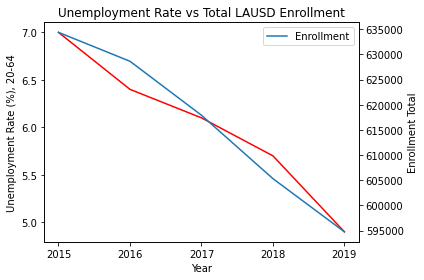

In [43]:
# plotting LAUSD enrollment vs unemployment data
fig, ax1 = plt.subplots()

color = "tab:red"
ax1.set_xlabel("Year")
ax1.set_ylabel("Unemployment Rate (%), 20-64")
ax1.plot(x_axis_econ, lausd_y_20, color="red", label="Unemployment")
# ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Enrollment Total')  # we already handled the x-label with ax1
ax2.plot(x_axis_econ, lausd_enrollment, label="Enrollment")
# ax2.tick_params(axis='y', labelcolor=color)

plt.legend()
plt.title("Unemployment Rate vs Total LAUSD Enrollment")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Resources/output_data/output_images/LAUSD_enrollment_unemployment.png")
plt.show()

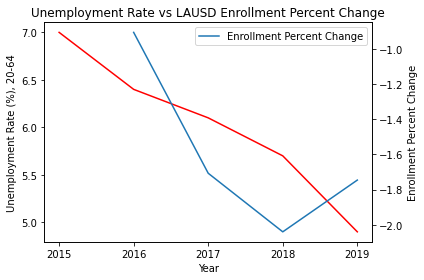

In [44]:
# plotting LAUSD enrollment vs unemployment data
fig, ax1 = plt.subplots()

color = "tab:red"
ax1.set_xlabel("Year")
ax1.set_ylabel("Unemployment Rate (%), 20-64")
ax1.plot(x_axis_econ, lausd_y_20, color="red", label="Unemployment")
# ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Enrollment Percent Change')  # we already handled the x-label with ax1
ax2.plot(x_axis_econ, lausd_enroll_change, label="Enrollment Percent Change")
# ax2.tick_params(axis='y', labelcolor=color)

plt.legend()
plt.title("Unemployment Rate vs LAUSD Enrollment Percent Change")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Resources/output_data/output_images/LAUSD_enrollchange_unemployment.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

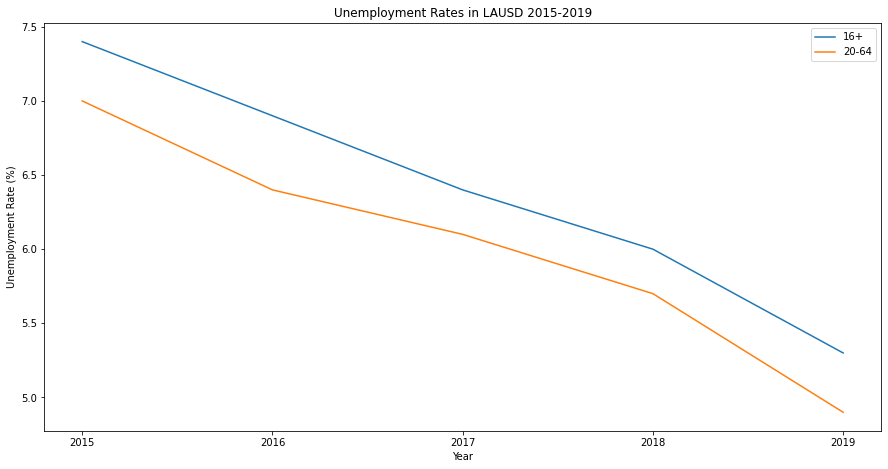

In [125]:
# plotting unemployment rates within LAUSD boundary from 2015-2019
x_axis_econ = ["2015", "2016", "2017", "2018", "2019"]

plt.figure(figsize=(15,7.5))
plt.plot(x_axis_econ, lausd_y_16, label="16+")
plt.plot(x_axis_econ, lausd_y_20, label="20-64")
plt.legend()
plt.title("Unemployment Rates in LAUSD 2015-2019")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")

plt.savefig("Resources/output_data/output_images/LAUSD_unemployment_rates.png")
plt.show

In [45]:
data_df

,Unnamed: 0,District,Year,Total Enrollment,Percent Change,NCESDist,School District Type,"Population, 16+","Employment Ratio, 16+","Unemployment Rate, 16+","Population, 20-64","Employment Ratio, 20-64","Unemployment Rate, 20-64"
0,0,Rocklin Unified,2018,14070,3.814654,600013,Unified,51542.0,59.9,5.6,38279.0,73.4,5.0
1,1,Rocklin Unified,2019,14125,0.390903,600013,Unified,51882.0,58.6,4.4,36253.0,75.1,4.1
2,2,Hesperia Unified,2015,23970,NaN,600014,Unified,74447.0,50.4,14.7,58032.0,61.2,13.8
3,3,Hesperia Unified,2016,23829,-0.588235,600014,Unified,82334.0,48.6,8.7,62228.0,60.4,7.7
4,4,Hesperia Unified,2017,24138,1.296739,600014,Unified,80751.0,49.3,11.8,60671.0,62.7,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,969,Val Verde Unified,2015,19833,NaN,691135,Unified,68697.0,55.6,10.7,53982.0,65.5,10.2
970,970,Val Verde Unified,2016,19924,0.458831,691135,Unified,61066.0,54.0,5.9,46370.0,66.1,5.1
971,971,Val Verde Unified,2017,20215,1.460550,691135,Unified,72651.0,55.7,10.8,57404.0,67.8,10.5
972,972,Val Verde Unified,2018,20109,-0.524363,691135,Unified,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
data_df = data_df.dropna()

In [145]:
enrollment_change_x = data_df["Percent Change"]
quants = enrollment_change_x.quantile(q=[0.005,0.995])
ylim_bottom = quants[0.005]
ylim_top = quants[0.995]

enrollment_change_y = data_df["Percent Change"]
unemployment_x = data_df["Unemployment Rate, 20-64"]

In [153]:
corr_coeff = stats.pearsonr(unemployment_x, enrollment_change_y)
print(f"The correlation coefficient between unemployment rate and percent enrollment change in California is {round(corr_coeff[0],2)}.")

The correlation coefficient between unemployment rate and percent enrollment change in California is 0.07.


In [101]:
# linear regression using scipy
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(unemployment_x, enrollment_change_y)  

# finding regression values
regress_values = unemployment_x * slope + intercept  

# finding equation of regression line
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

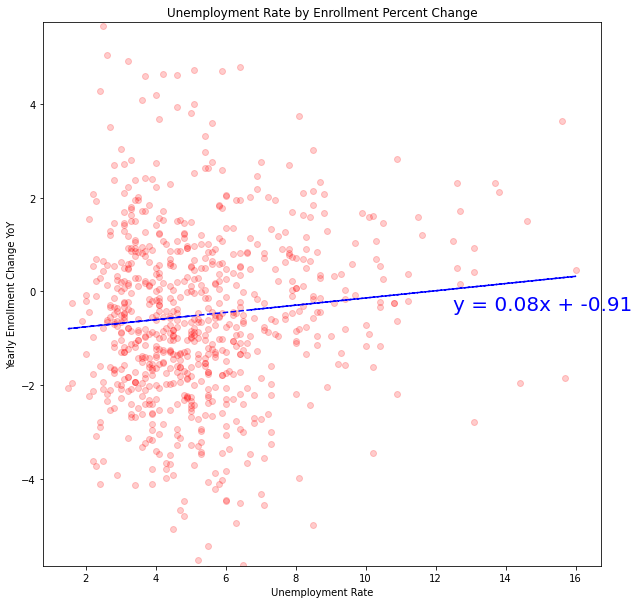

In [126]:
# creating scatter plot based on variables above
plt.figure(figsize=(10,10))
plt.scatter(unemployment_x, enrollment_change_y, alpha=0.2, color="red")
plt.plot(unemployment_x, regress_values, "--", color="blue")
plt.annotate(line_equation, (12.5,-0.4), fontsize=20, color="blue")

plt.title("Unemployment Rate by Enrollment Percent Change")
plt.ylabel("Yearly Enrollment Change YoY")
plt.xlabel("Unemployment Rate")
plt.ylim(ylim_bottom, ylim_top)

plt.savefig("Resources/output_data/output_images/unemp_vs_yoy_enroll_change.png")
plt.show()

In [142]:
enrollment_y = data_df["Total Enrollment"]
quants2 = enrollment_y.quantile(q=[0.01,0.99])
ylim_2bottom = quants2[0.01]
ylim_2top = quants2[0.99]

In [152]:
corr_coeff2 = stats.pearsonr(unemployment_x, enrollment_y)
print(f"The correlation coefficient between unemployment rate and total enrollment in California is {round(corr_coeff2[0],2)}.")

The correlation coefficient between unemployment rate and total enrollment in California is 0.05.


In [154]:
# linear regression using scipy
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(unemployment_x, enrollment_y)  

# finding regression values
regress_values2 = unemployment_x * slope + intercept  

# finding equation of regression line
line_equation2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

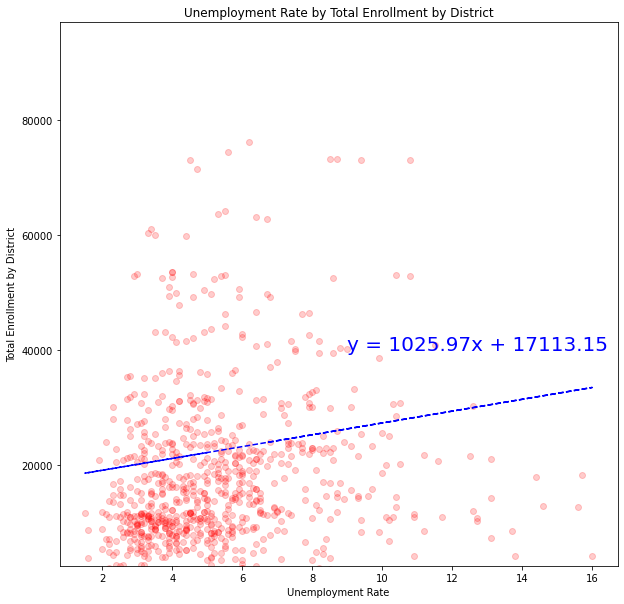

In [158]:
# creating scatter plot based on variables above
plt.figure(figsize=(10,10))
plt.scatter(unemployment_x, enrollment_y, alpha=0.2, color="red")
plt.plot(unemployment_x, regress_values2, "--", color="blue")
plt.annotate(line_equation2, (9,40000), fontsize=20, color="blue")

plt.title("Unemployment Rate by Total Enrollment by District")
plt.ylabel("Total Enrollment by District")
plt.xlabel("Unemployment Rate")
plt.ylim(ylim_2bottom, ylim_2top)

plt.savefig("Resources/output_data/output_images/unemp_vs_total_enrollment.png")
plt.show()